# importing libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# importing data

In [2]:
df_genes= pd.read_csv('/Users/cmdb/qbb2020-answers/day2-evening/matrix_1kg.txt', sep='\t')

In [3]:
df_genes

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# removing columns that dont have data

In [4]:
pca_input = df_genes.iloc[:,4:]
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# summing the alleles

In [5]:
pca_input.sum(axis =1)


0         2
1        98
2        17
3        11
4         2
       ... 
9995    105
9996      1
9997      7
9998    147
9999     13
Length: 10000, dtype: int64

# add a total column and sum all rows

In [6]:
pca_input['Total'] = pca_input.sum(axis = 1) 
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,98
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,105
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,7
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,147


# add a frequency column and add the allele count/total (aka allele freq)

In [7]:
pca_input['Frequency']=(pca_input.iloc[:,-1])/5096
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total,Frequency
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.000392
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,0.019231
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,17,0.003336
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,11,0.002159
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0.000392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,105,0.020604
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.000196
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,7,0.001374
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,147,0.028846


# taking out the one freq column so we can use it as a chart

In [8]:
pca_input_freq=(pca_input.iloc[:,-1])
pca_input_freq

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Name: Frequency, Length: 10000, dtype: float64

# turning it into a list cause thats the only way i know how to plot it

In [9]:
import numpy as np
frequency = pca_input_freq.to_list()
frequency

[0.0003924646781789639,
 0.019230769230769232,
 0.0033359497645211933,
 0.0021585557299843012,
 0.0003924646781789639,
 0.0017660910518053376,
 0.00019623233908948196,
 0.00019623233908948196,
 0.006868131868131868,
 0.0009811616954474097,
 0.00019623233908948196,
 0.00019623233908948196,
 0.0011773940345368916,
 0.0005886970172684458,
 0.0003924646781789639,
 0.00019623233908948196,
 0.008634222919937205,
 0.00019623233908948196,
 0.0027472527472527475,
 0.02021193092621664,
 0.08025902668759811,
 0.0003924646781789639,
 0.00019623233908948196,
 0.00019623233908948196,
 0.0009811616954474097,
 0.005494505494505495,
 0.00019623233908948196,
 0.0003924646781789639,
 0.0013736263736263737,
 0.009419152276295133,
 0.0003924646781789639,
 0.00019623233908948196,
 0.5957613814756672,
 0.00019623233908948196,
 0.00019623233908948196,
 0.024725274725274724,
 0.00019623233908948196,
 0.030612244897959183,
 0.40561224489795916,
 0.004709576138147566,
 0.00019623233908948196,
 0.0943877551020408

# makin' that chart for part 2

Text(0.5, 1.0, 'allele frequency spectrum')

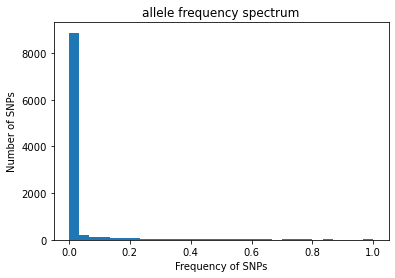

In [10]:
data= frequency
plt.hist(data, bins = 30)
plt.ylabel('Number of SNPs')
plt.xlabel('Frequency of SNPs')
plt.title('allele frequency spectrum')

# putting position data back on the chart in case we need it (before we remove some rows)

In [11]:
pca_input['POS']=df_genes['POS']
pca_input

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total,Frequency,POS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0.000392,14347281
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,98,0.019231,14003813
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,17,0.003336,39261634
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,11,0.002159,17793478
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0.000392,35934376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,105,0.020604,28142462
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.000196,17061272
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,7,0.001374,43768467
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,147,0.028846,36334991


# subsetting the dataset so that only common variations are included
### i wonder why we cap it at .95?

In [12]:
common_variation = pca_input[(pca_input.iloc[:,-2] > 0.05) & (pca_input.iloc[:,-2] < 0.95)]
common_variation

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,Total,Frequency,POS
20,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,409,0.080259,26683267
32,1,2,1,1,1,1,0,0,0,1,...,0,0,0,1,1,1,0,3036,0.595761,37584553
38,0,1,2,1,1,1,1,1,1,0,...,1,1,1,1,2,0,1,2067,0.405612,34522570
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,481,0.094388,41704121
46,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,497,0.097527,29502200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,1,2,4290,0.841837,40748951
9959,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,591,0.115973,42683839
9974,0,1,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,921,0.180730,38472865
9975,2,1,0,1,0,1,0,1,2,2,...,2,2,1,2,2,2,2,4128,0.810047,43359202


# removing the last 3 columns (total, freq, pos) before we do pca

In [13]:
pca_input3 = common_variation.iloc[:,:-3]
pca_input3

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32,1,2,1,1,1,1,0,0,0,1,...,1,1,2,0,0,0,1,1,1,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,1,2,2,2,2,2,1,2,2,1,...,2,2,2,2,2,2,2,2,1,2
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9975,2,1,0,1,0,1,0,1,2,2,...,1,2,2,2,2,1,2,2,2,2


# transposing the dataset so that the rows are individuals and columns are SNPs

In [14]:
pca_input4 = pca_input3.T
pca_input4

,20,32,38,41,46,54,66,77,93,98,...,9894,9904,9913,9927,9929,9957,9959,9974,9975,9980
HG00096,0,1,0,0,0,0,0,1,0,2,...,0,0,0,0,2,1,1,0,2,0
HG00097,1,2,1,1,0,1,0,0,0,1,...,0,0,0,1,0,2,0,1,1,0
HG00099,1,1,2,0,0,1,0,1,0,2,...,0,1,1,0,1,2,1,1,0,0
HG00100,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,1,2,0,0,1,0
HG00101,0,1,1,0,0,2,1,0,0,0,...,0,0,1,0,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,2,2,2,0,1,1,0
NA21141,0,1,1,0,0,0,1,0,0,1,...,0,0,0,0,2,2,0,1,2,0
NA21142,0,1,2,0,0,0,0,0,0,2,...,0,0,1,1,0,2,0,0,2,0
NA21143,0,1,0,0,0,2,1,1,0,0,...,0,1,0,1,1,1,0,0,2,0


# looking at means to see if we need to standardize
#### I wonder how we know if we need to standardize, i did this time cause steph said it was 'good practice'

In [15]:
pca_input4.mean(axis = 0)

20      0.160518
32      1.191523
38      0.811224
41      0.188776
46      0.195055
          ...   
9957    1.683673
9959    0.231947
9974    0.361460
9975    1.620094
9980    0.155416
Length: 986, dtype: float64

# looking at vars to see if we need to standardize
#### I wonder how we know if we need to standardize, i did this time cause steph said it was 'good practice'

In [16]:
pca_input4.var(axis = 0)

20      0.150510
32      0.504333
38      0.525402
41      0.193247
46      0.187694
          ...   
9957    0.287020
9959    0.213553
9974    0.320414
9975    0.349529
9980    0.180783
Length: 986, dtype: float64

# standardizing the dataset

In [17]:
pca_input_standardized = StandardScaler().fit_transform(pca_input4)
pca_input_standardized.mean(axis = 0)


array([-1.56424673e-16, -6.55327876e-16,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  5.70536118e-16,  1.65749152e-16,
        2.45835098e-16,  2.91847481e-16, -6.09446211e-16, -1.71966924e-15,
        1.30866777e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  1.09048476e-15,  5.13979231e-16,
        1.90010226e-15,  3.07794955e-16,  1.41814870e-15,  2.18210240e-16,
        1.21828241e-16, -2.11726677e-15,  1.54158911e-16, -3.32805473e-16,
       -1.36189682e-15, -3.84264398e-16,  1.92110413e-16,  2.84091606e-16,
       -3.47184343e-16,  2.08206032e-15, -4.99861795e-16, -1.89713934e-15,
       -1.42045803e-16, -8.29878639e-16,  2.96379004e-16,  3.13546503e-16,
       -5.90753680e-16, -2.23621923e-15, -6.62038016e-16, -1.99674570e-15,
       -2.44266494e-16, -1.29531829e-15, -5.92017278e-16,  1.59069513e-15,
       -3.25398177e-16, -9.36957646e-16, -7.13496940e-16,  3.40866355e-16,
        1.77016957e-15,  

# checking the shape of the array

In [18]:
pca_input_standardized.shape

(2548, 986)

# the actual PCA

In [19]:
pca_input_standardized.var(axis = 0)
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.14493037, -9.81856664, -1.54635697, ..., -0.54548389,
        -4.31465888, -2.16562139],
       [-6.13388414, -8.6318291 ,  2.55769147, ...,  5.08865935,
         1.86140845, -1.8540767 ],
       [-6.23847319, -7.97187003, -0.74585185, ..., -1.64037724,
        -0.17410384,  1.67981353],
       ...,
       [-4.09694721, -2.82736152, -4.18044436, ...,  0.81096341,
         2.92651909,  2.3436332 ],
       [-6.26346243, -2.58507985, -4.22592098, ..., -0.72315497,
         1.73345019,  1.37458086],
       [-3.17677867, -0.9169498 , -6.45117101, ...,  2.89467314,
         2.55097037,  0.39699941]])

# checking the shape again cause i kept having issues

In [20]:
pca_output.shape

(2548, 10)

# changing the array into a dataframe, naming the columns, checking the df

In [21]:
pca_output_df_1=pd.DataFrame(data=pca_output, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
pca_output_df_1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546357,-5.396675,-0.516238,-0.167999,1.264435,-0.545484,-4.314659,-2.165621
1,-6.133884,-8.631829,2.557691,-3.896879,0.300081,-2.211391,1.190501,5.088659,1.861408,-1.854077
2,-6.238473,-7.971870,-0.745852,-4.015940,-0.922886,3.984866,-0.649018,-1.640377,-0.174104,1.679814
3,-5.051218,-7.008727,2.805268,-4.766281,4.383096,0.270167,-0.779790,-1.593710,-0.185251,1.936366
4,-6.634383,-8.543670,3.071734,-1.593128,-4.353213,0.657843,0.223953,-3.613669,-0.223977,0.979943
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.665441,3.297996,-0.196936,-0.698811,-3.505091,0.488939,-0.846900,-0.487361
2544,-6.295888,-3.116491,-5.555516,3.335222,3.325327,3.538256,-2.413569,-3.448374,0.461209,-1.864017
2545,-4.096947,-2.827362,-4.180444,3.694811,1.541126,0.285310,-1.782734,0.810963,2.926519,2.343633
2546,-6.263462,-2.585080,-4.225921,3.890978,-3.928076,-1.980917,-0.864939,-0.723155,1.733450,1.374581


# printing our figure

NameError: name 'pca_output_df' is not defined

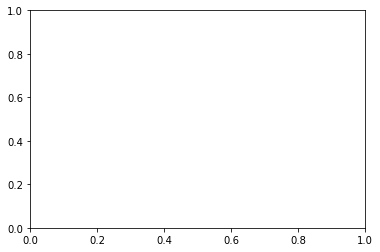

In [22]:
fig, ax = plt.subplots()
ax.scatter(x=pca_output_df['PC1'], y=pca_output_df['PC2'])

# trying the color coding stuff
# pray for me

In [ ]:
# importing metadata

In [ ]:
df_metadata= pd.read_csv('/Users/cmdb/qbb2020/data/integrated_call_samples_v3.20130502.ALL.panel', sep='\t')
df_metadata

In [ ]:
#pca_input4['sample']=(pca_input4.iloc[:,index])
#sample_list = pca_input4_index.to_list()
sample_list=pca_input4.index.values.tolist()
sample_list

pca_output_df_1['sample'] = sample_list
pca_output_df_1
#pca_input['Total'] = pca_input.sum(axis = 1) 


#frequency = pca_input_freq.to_list()


#sample_list=[]
#sa
#pca_input4


In [ ]:
pca_output_df = pd.merge(pca_output_df_1, df_metadata, on = "sample")
pca_output_df

In [ ]:
fig, ax = plt.subplots()
gender = pca_output_df.groupby("gender")
for name, group in gender:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

#fig, ax = plt.subplots()
#ax.scatter(x=pca_output_df['PC1'], y=pca_output_df['PC2'])

In [ ]:
fig, ax = plt.subplots()
pop = pca_output_df.groupby("pop")
for name, group in pop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

In [ ]:
fig, ax = plt.subplots()
super_pop = pca_output_df.groupby("super_pop")
for name, group in super_pop:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
    
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol = 2)

# now I can die happy cause i got this to work